In [23]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from sklearn import cluster
import numpy

In [24]:
#on import le csv contenant seulement les variables numériques et on garde l'iris code en tant qu'identifiant

df = pd.read_csv("iris_acp_csv.csv", sep = ";", index_col = 0)
key = list(df.columns)
df.head()

,POPULATION_ACTIVE,Elèv.Etud.Stag.non_rémunérés_15-64_ans,Retraités_ou_Pré__15-64_ans,Autres_inactifs_15-64_ans,CSP+,CSP-,Actifs_occ_15_ans_ou_plus_voiture,Actifs_occ_15_ans_ou_plus_TC,0-2_ans,3-5_ans,...,Sans_diplôme_ou_CEP_ou_BEPC,CAP_BEP_BAC_PRO,Men_1_personne_,Men_Autres_sans_famille_,Men_fam_princ_Couple_sans_enfant_,Men_fam_princ_Couple_avec_enfants_,Men_fam_princ_Famille_mono_,Fam_Couple_avec_enfants_,Fam_Monoparentales_,Fam_Couple_sans_enfant_
IRIS_CODE,,,,,,,,,,,,,,,,,,,,,
784980116,0.59,0.44,0.11,0.45,0.33,0.67,0.33,0.67,0.03,0.00,...,0.43,0.44,0.22,0.0,0.29,0.71,0.00,0.62,0.12,0.25
950180601,0.77,0.28,0.53,0.19,0.28,0.72,0.51,0.29,0.02,0.00,...,0.38,0.51,0.33,0.0,0.55,0.32,0.13,0.32,0.13,0.55
930140105,0.64,0.28,0.13,0.59,0.08,0.92,0.45,0.53,0.04,0.07,...,0.66,0.28,0.03,0.0,0.11,0.39,0.50,0.43,0.47,0.10
930010301,0.43,0.03,0.00,0.97,0.03,0.97,0.00,1.00,0.00,0.00,...,0.68,0.29,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
783610105,0.67,0.44,0.06,0.50,0.17,0.83,0.44,0.42,0.01,0.04,...,0.65,0.19,0.40,0.0,0.29,0.51,0.19,0.49,0.19,0.32


In [25]:
#on divise le dataset en 2 afin d'étudier la variable CSP+ et d'effectuer le score d'information mutuelle
X = df.copy()
y = X.pop("CSP+")

In [26]:
#fonction qui permet de calculer le score d'info mutuelle et de le print

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores

CSP-                                      4.096844
Enseignement_sup                          1.222922
Sans_diplôme_ou_CEP_ou_BEPC               0.944556
CAP_BEP_BAC_PRO                           0.590272
Fam_Couple_sans_enfant_                   0.529239
Men_fam_princ_Couple_sans_enfant_         0.509365
Elèv.Etud.Stag.non_rémunérés_15-64_ans    0.364686
Autres_inactifs_15-64_ans                 0.339803
Men_fam_princ_Famille_mono_               0.307038
Fam_Monoparentales_                       0.290692
6-10_ans                                  0.250600
3-5_ans                                   0.206773
POPULATION_ACTIVE                         0.179785
11-17_ans                                 0.159049
Men_1_personne_                           0.155452
Actifs_occ_15_ans_ou_plus_voiture         0.149251
0-2_ans                                   0.143351
Men_fam_princ_Couple_avec_enfants_        0.119721
25-39_ans                                 0.112379
65-79_ans                      

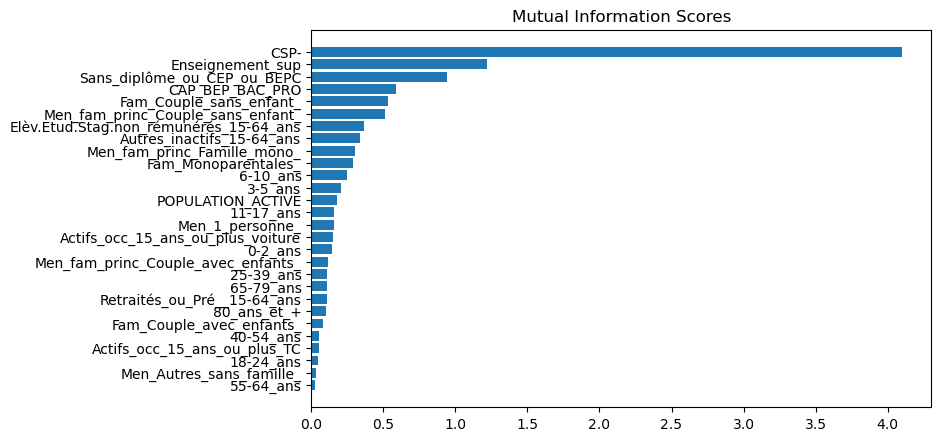

In [27]:
#fonction qui permet d'afficher le score : au dessus de 1 c'est très lié en dessous de 0.5 pas de correlation

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [28]:
#algorithme de k-mean qui s'applique sur toutes les features, 6 clusters après etude visuelle des données pas de raisonnement statistique

res = cluster.KMeans(n_clusters = 6)
res.fit(df.copy())

KMeans(n_clusters=6)

In [29]:
res.labels_

array([4, 1, 4, ..., 5, 5, 2])

In [30]:
#taille des clusters

numpy.unique(res.labels_, return_counts = True)

(array([0, 1, 2, 3, 4, 5]), array([706, 757, 577, 716, 637, 674], dtype=int64))

In [31]:
#on regroupe les clusters ensembles
gb = df.groupby(res.labels_)

In [32]:
#prototype de chaque cluster : moyenne de chaque feature
mean = gb.mean()
mean

,POPULATION_ACTIVE,Elèv.Etud.Stag.non_rémunérés_15-64_ans,Retraités_ou_Pré__15-64_ans,Autres_inactifs_15-64_ans,CSP+,CSP-,Actifs_occ_15_ans_ou_plus_voiture,Actifs_occ_15_ans_ou_plus_TC,0-2_ans,3-5_ans,...,Sans_diplôme_ou_CEP_ou_BEPC,CAP_BEP_BAC_PRO,Men_1_personne_,Men_Autres_sans_famille_,Men_fam_princ_Couple_sans_enfant_,Men_fam_princ_Couple_avec_enfants_,Men_fam_princ_Famille_mono_,Fam_Couple_avec_enfants_,Fam_Monoparentales_,Fam_Couple_sans_enfant_
0,0.814561,0.604207,0.131091,0.264816,0.804830,0.194943,0.118371,0.634320,0.030326,0.026147,...,0.134193,0.187833,0.530255,0.039873,0.482564,0.361870,0.155623,0.360453,0.157422,0.482110
1,0.772523,0.429406,0.181057,0.389934,0.462325,0.537332,0.508520,0.375575,0.047054,0.047226,...,0.321955,0.405284,0.306499,0.023118,0.287239,0.502417,0.210436,0.495839,0.215931,0.287900
2,0.792028,0.493501,0.156898,0.349428,0.604038,0.395806,0.223102,0.597522,0.039671,0.037730,...,0.260000,0.313293,0.420884,0.036984,0.325078,0.439671,0.235182,0.435563,0.239775,0.324471
3,0.787905,0.499553,0.255656,0.244595,0.640237,0.359288,0.604288,0.287737,0.035852,0.038254,...,0.218408,0.380028,0.283478,0.015656,0.366885,0.490768,0.142207,0.487067,0.145838,0.366983
4,0.731460,0.393359,0.112308,0.494521,0.316970,0.682716,0.337567,0.541256,0.049278,0.051821,...,0.447394,0.366044,0.296593,0.035181,0.206075,0.499089,0.293234,0.490204,0.301177,0.207127
5,0.789985,0.601573,0.162478,0.235979,0.791499,0.208101,0.383071,0.430030,0.034080,0.035401,...,0.138205,0.232107,0.372404,0.020252,0.391558,0.471528,0.137151,0.469510,0.139273,0.391706


In [33]:
#point median de chaque feature

resume = gb.median()
resume

,POPULATION_ACTIVE,Elèv.Etud.Stag.non_rémunérés_15-64_ans,Retraités_ou_Pré__15-64_ans,Autres_inactifs_15-64_ans,CSP+,CSP-,Actifs_occ_15_ans_ou_plus_voiture,Actifs_occ_15_ans_ou_plus_TC,0-2_ans,3-5_ans,...,Sans_diplôme_ou_CEP_ou_BEPC,CAP_BEP_BAC_PRO,Men_1_personne_,Men_Autres_sans_famille_,Men_fam_princ_Couple_sans_enfant_,Men_fam_princ_Couple_avec_enfants_,Men_fam_princ_Famille_mono_,Fam_Couple_avec_enfants_,Fam_Monoparentales_,Fam_Couple_sans_enfant_
0,0.830,0.61,0.125,0.26,0.81,0.19,0.11,0.64,0.03,0.03,...,0.13,0.19,0.53,0.04,0.48,0.36,0.15,0.36,0.15,0.48
1,0.770,0.43,0.180,0.38,0.47,0.53,0.51,0.38,0.05,0.05,...,0.32,0.41,0.30,0.02,0.28,0.50,0.21,0.50,0.21,0.29
2,0.800,0.49,0.150,0.34,0.61,0.39,0.22,0.59,0.04,0.04,...,0.25,0.31,0.42,0.03,0.33,0.44,0.23,0.44,0.23,0.32
3,0.790,0.50,0.255,0.24,0.64,0.36,0.60,0.29,0.04,0.04,...,0.22,0.38,0.28,0.01,0.37,0.49,0.14,0.49,0.14,0.37
4,0.740,0.39,0.110,0.49,0.32,0.68,0.33,0.55,0.05,0.05,...,0.44,0.37,0.29,0.03,0.20,0.50,0.29,0.49,0.30,0.20
5,0.795,0.60,0.160,0.24,0.79,0.21,0.37,0.45,0.03,0.04,...,0.14,0.23,0.38,0.02,0.39,0.47,0.14,0.47,0.14,0.39


In [34]:
df["cluster"] = res.labels_

In [35]:
#dataframe final avec attribution des clusters à importer sur QGIS
df

,POPULATION_ACTIVE,Elèv.Etud.Stag.non_rémunérés_15-64_ans,Retraités_ou_Pré__15-64_ans,Autres_inactifs_15-64_ans,CSP+,CSP-,Actifs_occ_15_ans_ou_plus_voiture,Actifs_occ_15_ans_ou_plus_TC,0-2_ans,3-5_ans,...,CAP_BEP_BAC_PRO,Men_1_personne_,Men_Autres_sans_famille_,Men_fam_princ_Couple_sans_enfant_,Men_fam_princ_Couple_avec_enfants_,Men_fam_princ_Famille_mono_,Fam_Couple_avec_enfants_,Fam_Monoparentales_,Fam_Couple_sans_enfant_,cluster
IRIS_CODE,,,,,,,,,,,,,,,,,,,,,
784980116,0.59,0.44,0.11,0.45,0.33,0.67,0.33,0.67,0.03,0.00,...,0.44,0.22,0.00,0.29,0.71,0.00,0.62,0.12,0.25,4
950180601,0.77,0.28,0.53,0.19,0.28,0.72,0.51,0.29,0.02,0.00,...,0.51,0.33,0.00,0.55,0.32,0.13,0.32,0.13,0.55,1
930140105,0.64,0.28,0.13,0.59,0.08,0.92,0.45,0.53,0.04,0.07,...,0.28,0.03,0.00,0.11,0.39,0.50,0.43,0.47,0.10,4
930010301,0.43,0.03,0.00,0.97,0.03,0.97,0.00,1.00,0.00,0.00,...,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4
783610105,0.67,0.44,0.06,0.50,0.17,0.83,0.44,0.42,0.01,0.04,...,0.19,0.40,0.00,0.29,0.51,0.19,0.49,0.19,0.32,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772510106,0.81,0.64,0.10,0.26,0.53,0.47,0.60,0.34,0.06,0.06,...,0.43,0.33,0.02,0.25,0.58,0.17,0.57,0.17,0.25,1
951270130,0.82,0.54,0.07,0.39,0.54,0.46,0.41,0.53,0.08,0.06,...,0.38,0.39,0.03,0.23,0.47,0.30,0.47,0.30,0.23,2
920120303,0.83,0.58,0.05,0.37,0.74,0.26,0.32,0.42,0.06,0.05,...,0.20,0.43,0.02,0.29,0.56,0.16,0.55,0.16,0.29,5


In [36]:
#export des dataframes

df.to_csv('df2.csv', encoding='utf-8', sep = ";")

In [37]:
resume.to_csv('resume.csv', encoding='utf-8', sep = ";")

In [38]:
mean.to_csv('mean.csv', encoding='utf-8', sep = ";")

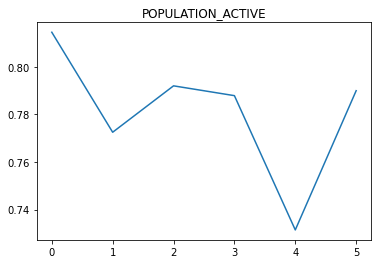

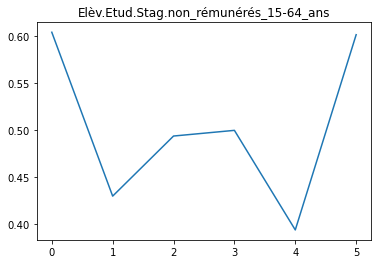

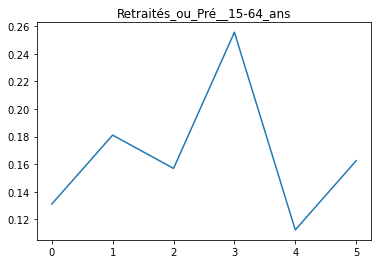

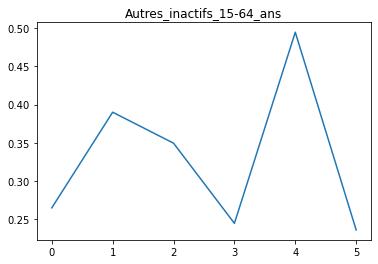

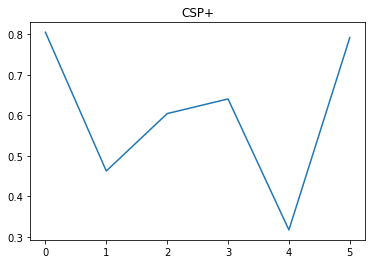

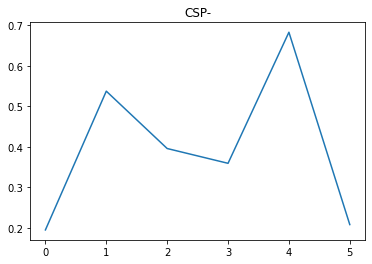

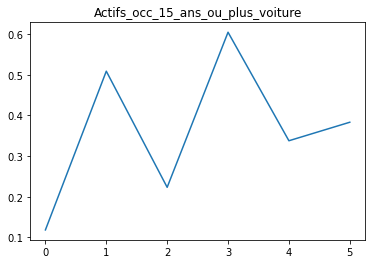

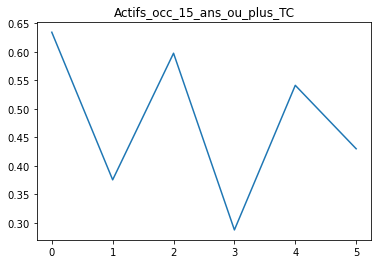

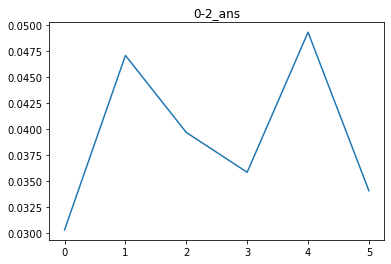

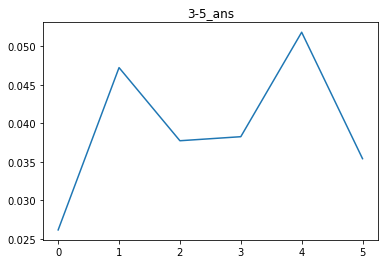

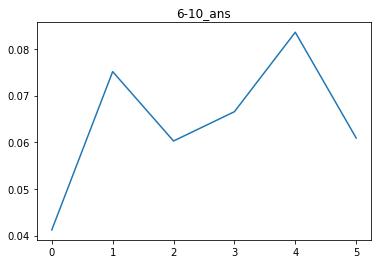

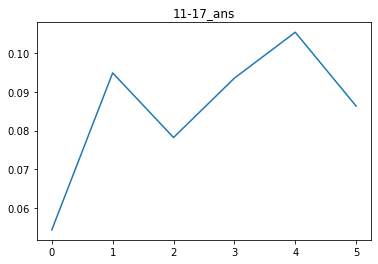

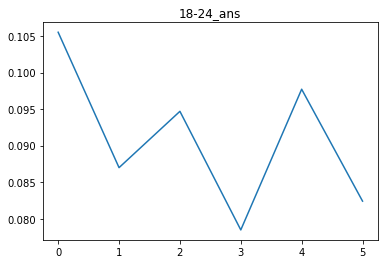

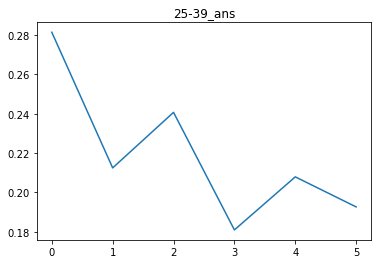

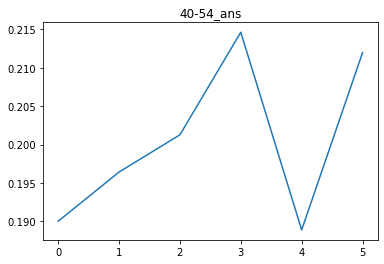

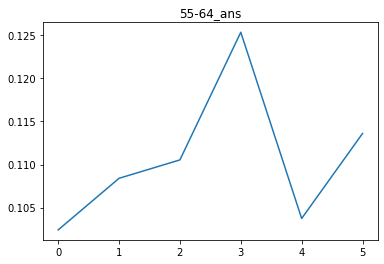

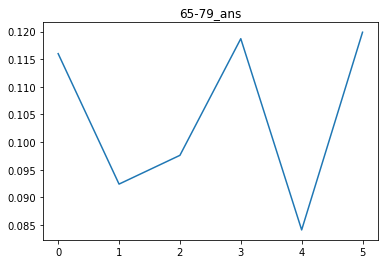

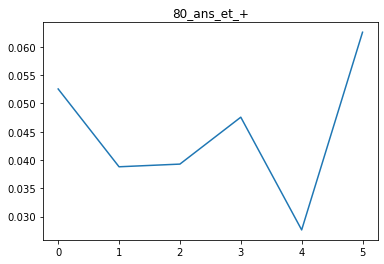

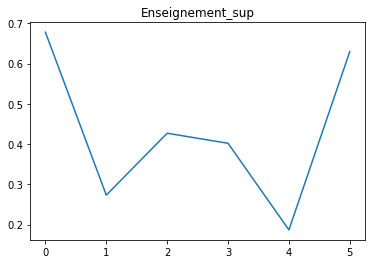

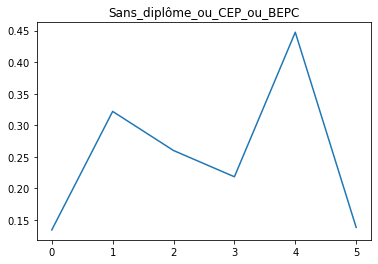

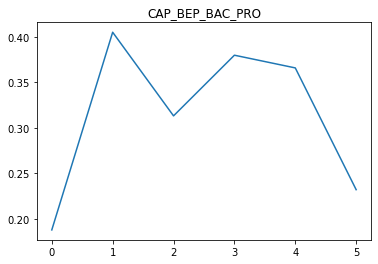

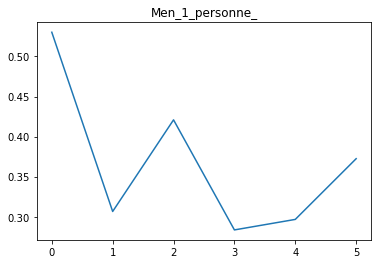

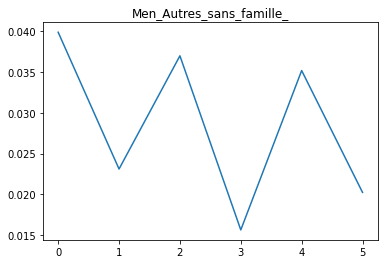

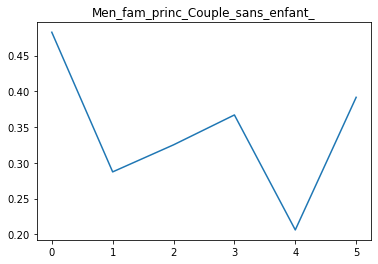

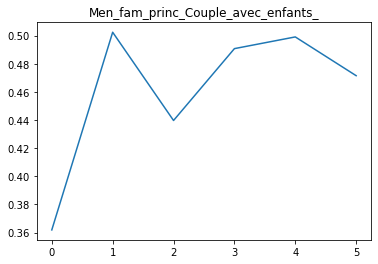

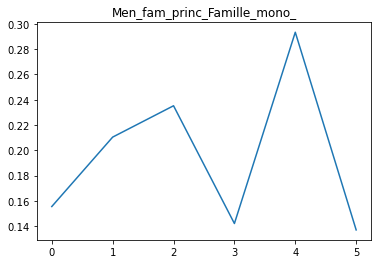

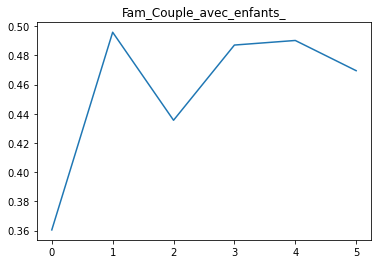

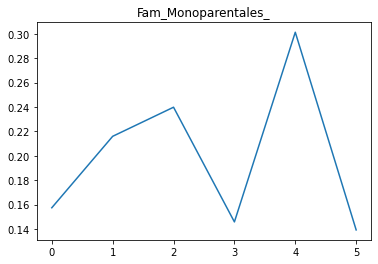

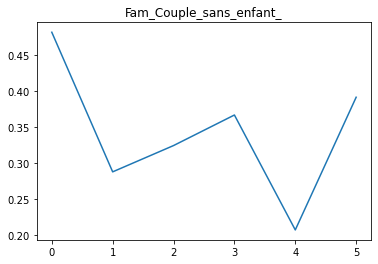

In [39]:
#test de redondance entre chaque features, cetraines se ressemblent fortement

for i in mean:
    values = mean[[i]]
    plt.title(i)
    plt.plot(values)
    show()